
## 2. Somehow able to read data in these images and convert it to row and column format, so that the data can be inserted into database:  

To have a full-fledged solution for this part is really difficult task. For that reason, you 
are expected here to make a working solution for only the images mentioned in 
dataset_part2 (contains 2 bar graph plots).  You can have different code that works 
for  different images. 

Make use of existing OCR engines  to extract the information in the given images. 

__Tasks:__
- a) Extract and print  ‘title of graph’ and make bounding boxes around the texts detected in the images and save the resultant images with Bounding boxes.Save images as ’ {image_name}_bboxes.png’ 
- b) Make use of computer vision skills, get individual bars and their values (Hint : contour detection, edge detection etc). Write the individual results into ‘{image_name}.csv’  


__Deliverables:__  
- 4. Complete code or notebook .
- 5. Documentation containing instructions to run your code and a requirements.txt file (You can also make use of Markdown cells if you are using a notebook) 

__Resources for part 2:__
- a) The easiest way to get started is using EasyOCR (https://pypi.org/project/easyocr/) . 
- b) Look at cv2 contour detection, edge detection, corner detection. (Feel free to ask and discuss approaches on the graph2table teams channel)

### Install pytesseract if not already installed

In [1]:
#!pip install pytesseract opencv-python

In [2]:
#!pip install easyocr --user

### Add all necessary imports

In [3]:
import os
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import easyocr

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## a) Extract and print  ‘title of graph’ and make bounding boxes around the texts detected in the images and save the resultant images with Bounding boxes.Save images as ’ {image_name}_bboxes.png’ 

### First attempt with Pytesserect


Extracted Title: Activities at home
Saved: output_bboxes\image_1_bboxes_pytesseract_filtered.png
All text: ['', '', '', '', 'Activities', 'at', 'home', '', '', '', '20+', '', '1g', '+', '', '16+', '', '14+', '', '12+', '', '10+', '', '8', '+', '', '6L', '', 'at', '', '2+', 'oe', '“4K', '', '0', 'wv', '', '', '', 'Reading', 'Playing', 'Baking', 'Washing', 'hands', '', 'Type', 'of', 'activity', '%', '', '', '', '@', 'Practicle', '', '', '', 'Number', 'of', 'children', '', '', '', ' ', '', '', '', ' ', '', '', '', '']


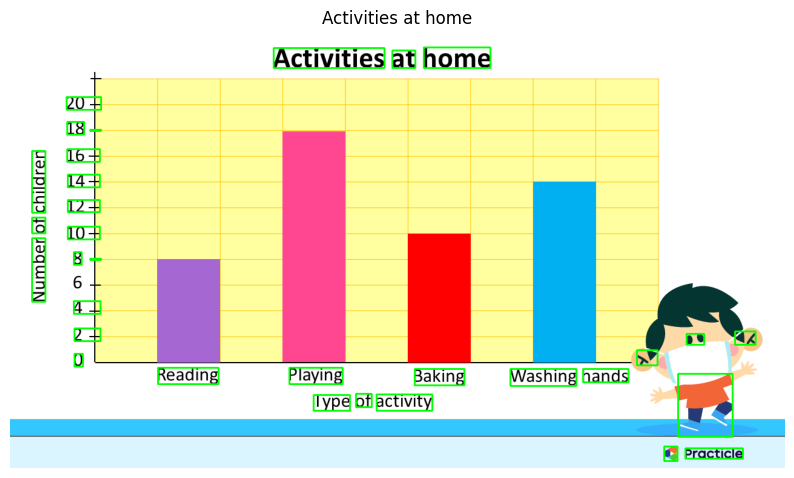

In [ ]:
# Path to your image
image_path = 'dataset_part2/image_2.png'
output_dir = 'output_bboxes'

os.makedirs(output_dir, exist_ok=True)

# Read the image
image = cv2.imread(image_path)

# OCR text detection
data = pytesseract.image_to_data(image, output_type=Output.DICT)

# Draw bounding boxes
n_boxes = len(data['text'])
title_text = []
topmost_y = float('inf')

for i in range(n_boxes):
    if int(data['conf'][i]) > 30 and data['text'][i].strip() != '':
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Collect text from bounding boxes close to the topmost line
        if y <= topmost_y + 10:  # Allow a small margin to include nearby boxes
            topmost_y = min(topmost_y, y)
            title_text.append(data['text'][i])

# Combine title text
full_title = ' '.join(title_text)

# Save output image
output_path = os.path.join(output_dir, f"image_1_bboxes_pytesseract.png")
cv2.imwrite(output_path, image)

# Print results
print(f"Extracted Title: {full_title if full_title else '[Title not found]'}")
print(f"Saved: {output_path}")
print(f"All text: {data['text']}")

# Convert BGR image (OpenCV format) to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.title(full_title if full_title else '[Title not found]')
plt.show()


### Second attempt with EasyOCR

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Title: Activities at home
Saved: output_bboxes\image_1_bboxes_easyocr.png
All text: ['Activities at home', '20', '18', '16', '1', '14', '12', '5', '10', '8', '1', '6', '4', '2', '0', 'Reading', 'Playing', 'Baking', 'Washing hands', 'Type of activity', 'Practicle']


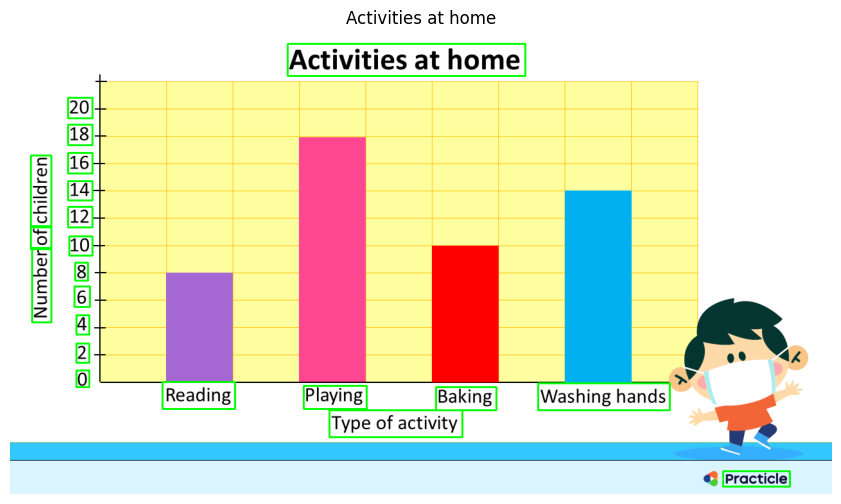

In [5]:
# Paths
image_path = 'dataset_part2/image_2.png'
output_dir = 'output_bboxes'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Read the image
image = cv2.imread(image_path)

# OCR text detection
results = reader.readtext(image)

title_text = []
topmost_y = float('inf')

for (bbox, text, confidence) in results:
    if confidence > 0.1:
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        y = top_left[1]
        if y <= topmost_y + 10:
            topmost_y = min(topmost_y, y)
            title_text.append(text)

# Combine title text
full_title = ' '.join(title_text)

# Save output image
output_path = os.path.join(output_dir, "image_1_bboxes_easyocr.png")
cv2.imwrite(output_path, image)

# Print results
print(f"Extracted Title: {full_title if full_title else '[Title not found]'}")
print(f"Saved: {output_path}")
all_text = [text for (_, text, _) in results]
print(f"All text: {all_text}")

# Show the result
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title(full_title if full_title else '[Title not found]')
plt.show()


### Here EasyOCR works best because it detects all the text with no gaps in the bboxes. But It has issues with vertical text, which Pytesseract doesn't. We will still result to EasyOCR because we can just flip the image if we want that data.

### So we will extract all the needed "text" data here:

### Lets start with extracting the title from the image using EasyOCR

In [6]:
# Path to image
image_path = 'dataset_part2/image_2.png'

# Initialize EasyOCR reader )
reader = easyocr.Reader(['en'])

# Read the image
image = cv2.imread(image_path)

# Crop the image to exclude useless parts
image = image[:-80, :] 

# OCR text detection
results = reader.readtext(image)
title_text = []
topmost_y = float('inf')

for (bbox, text, confidence) in results:
    if confidence > 0.1:
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        y = top_left[1]
        if y <= topmost_y + 10:
            topmost_y = min(topmost_y, y)
            title_text.append(text)

print(f"The extracted title is: {title_text}")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


The extracted title is: ['Activities at home']


### And lets get the titles from each axis

In [7]:
# Extract the x-axis text
words = []
for (bbox, text, confidence) in results:
    if confidence > 0.1:
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        words.append(text)
        
# Extract the last bounding box
x_axis_text = results[-1][1]  # Access the text directly from the last result
print(f"The x-axis text is: {x_axis_text}")

The x-axis text is: Type of activity


In [8]:
# Extract the y-axis text
image_path = 'dataset_part2/image_2.png'

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Read the image
image = cv2.imread(image_path)
# Rotate the image to get the y-axis text
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# OCR text detection on the rotated image
results_rotated = reader.readtext(rotated_image)
y_axis_text = []

for (bbox, text, confidence) in results_rotated:
    if confidence > 0.1:
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        cv2.rectangle(rotated_image, top_left, bottom_right, (0, 255, 0), 2)

        y_axis_text.append(text)

# Extract the first bounding box
y_axis_text = results_rotated[0][1]  # Access the text directly from the first result
print(f"The y-axis text is: {y_axis_text}")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


The y-axis text is: Number of children


### Perfect! Now we have all the textual data we need!